In [14]:
%load_ext autoreload
%autoreload 2
%pylab inline

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload
Populating the interactive namespace from numpy and matplotlib


In [90]:
from questionify import get_pitch_tier
import seaborn
import pandas as pd
from pydub import AudioSegment
import utils.pitch_tier

In [91]:
wav_path = "examples/12345.wav"


In [92]:
wav = AudioSegment.from_file(wav_path)

wav

In [117]:
p_tier = get_pitch_tier("examples/12345.wav")

p_tier.seek(0)
pitch_tier = utils.pitch_tier.parse_pitch_tier(p_tier)

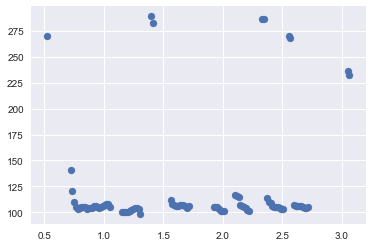

In [118]:
time, values = zip(*pitch_tier["points"])

scatter(time, values);

In [120]:
time = np.array(time)
values = np.array(values)

In [121]:
mu = values.mean()
increase_factor = 0.2

In [122]:
l1 = time.min () + 0.8 * (time.max() - time.min())
l2 = time.min () + 1.1 * (time.max() - time.min())

""" Hice la cuenta de esto.."""
a = (-increase_factor * mu) / float((l2 - l1)/2)**2

def f(x):
    if l1 <= x and x <= l2:
        return a * (x - l1) * (x - l2)
    else:
        return 0

t = np.arange(0, time.max(), 0.01)
fv = np.vectorize(f)

x = fv(time)

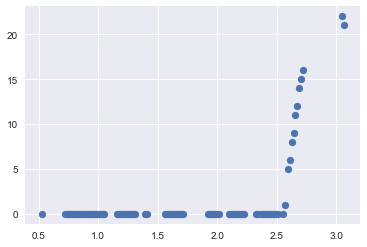

In [123]:
scatter(time, x)

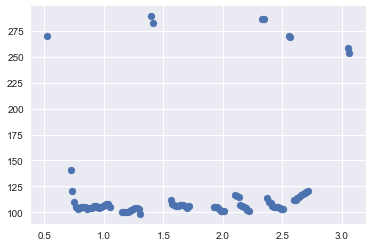

In [124]:
scatter(time, x + values)